In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st


In [2]:
PCR_PARAMS = {'V_sample': 1, 'c_1': 1/10, 'xi': 1/2, 'c_2': 1}  # c_1 = V_subsample / V_sample
PCR_LOD = 100

In [3]:
def calculate_FNR_for_fixed_VL_alternative(LoD, mu, params=PCR_PARAMS):
    V_sample = params['V_sample']
    c_1 = params['c_1']
    xi = params['xi']
    c_2 = params['c_2']
    mu = int(10 ** mu)
    fnr = st.binom.cdf(LoD - 1, V_sample * mu, c_1 * xi * c_2)
    return fnr
    # LoD = 174
    # mu = 3.5 -> 89.7% (VL = 3162)
    # mu = 3.55 -> 38.5%
    # mu = 3.594 -> 4.6%
    # mu = 3.65 -> 0.02% (VL = 4467)

In [8]:
def generate_indiv_test_sensitivity_curve(detection_threshold=174, lb=3, ub=4):
    mus = np.linspace(lb, ub, 100)
    Sns = [1 - calculate_FNR_for_fixed_VL_alternative(detection_threshold, mu) for mu in mus]
    plt.figure(figsize=(6,4))
    plt.plot(10**mus, Sns)
    plt.xscale('log')
    plt.xticks(10**np.linspace(lb, ub, 6), [r'$10^{{{0}}}$'.format(x) for x in np.linspace(lb,ub,6)], fontsize=12)
    plt.yticks(fontsize=12)
    plt.minorticks_off()
    plt.xlabel(r"viral load $v$ (copies/mL)", fontsize=14)
    plt.ylabel(r"PCR test sensitivity $p(v)$", fontsize=14)
    # plt.title(r"PCR test sensitvity $p(v)$ under $\bar\beta=5\%$")
    plt.title(r"PCR test sensitvity $p(v)$", fontsize=15)
    # plt.savefig(f'../figs/PCR_test_sensitivity_{detection_threshold}.pdf', bbox_inches='tight')
    # plt.close()

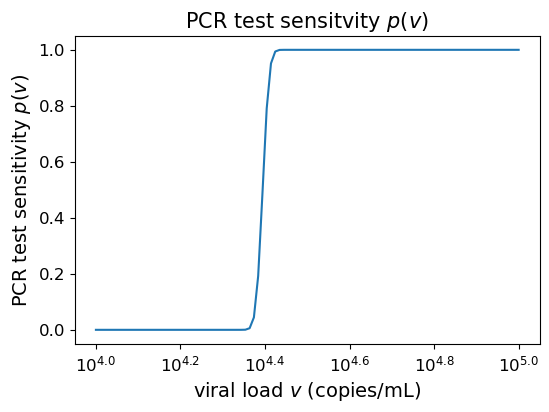

In [9]:
generate_indiv_test_sensitivity_curve(detection_threshold=1240, lb=4, ub=5)